<h1 style = "text-align: center; color: #488558;">R Visualization with ggplot() library </h1>

In [7]:
library(ggplot2)
library(repr)
library(tidyr)
library(dplyr)

<ul style = "font-size:20px;"> 
    <li> <a href='#Scatter_plot'>Scatter Plots</a> </li>
    <li> <a href='#Bar_plot'>Bar Plots</a> </li>
    <li> <a href='#Box_plot'>Box Plots</a> </li>
    
</ul>



<a id='Scatter_plot'></a>

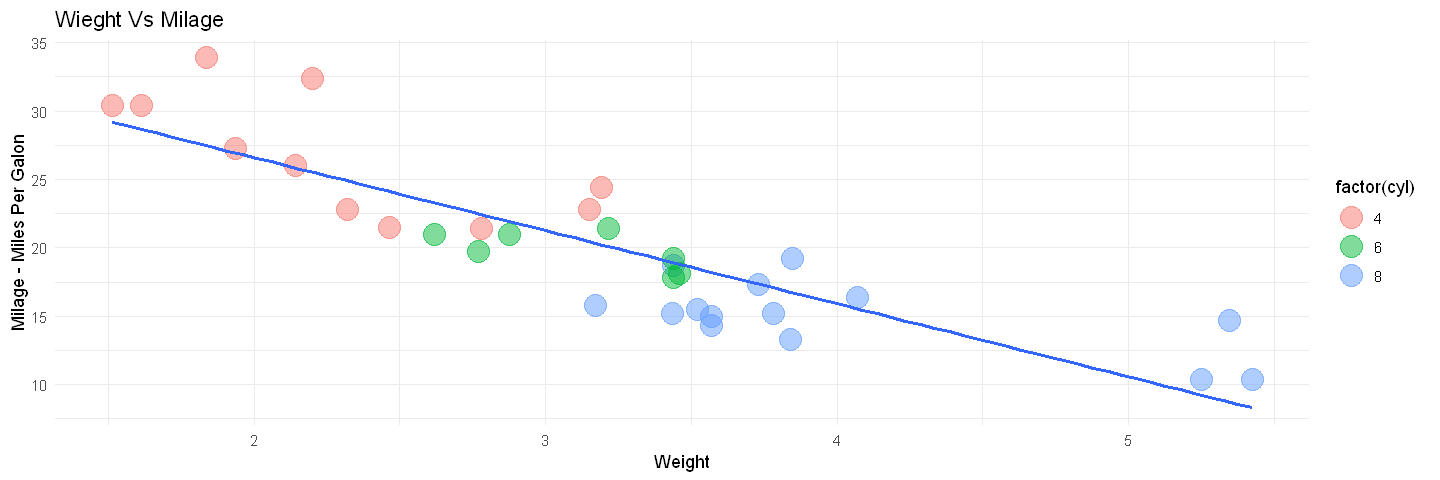

In [2]:
# scatter plots
options(repr.plot.width=12, repr.plot.height=4)
# ggplot(data =  , mapping  = aes()) - First to add
plt <- ggplot(data = mtcars, mapping = aes(x = mtcars$wt, y = mtcars$mpg)) 
# adding a geometric layer
plt <- plt + geom_point(alpha = 0.5, size = 6, aes(col = factor(cyl))) # inside aes other columns can be given to show the differentiaion
# size = size of the points
plt <- plt + labs(title = "Wieght Vs Milage" ,x = "Weight", y = "Milage - Miles Per Galon")
# alpha = transperency
# Adding a best fit smooth trend line
plt <- plt+ geom_smooth(method = "lm", se = F) # se = False supresses the confidence intervals
plt <- plt+theme_minimal()
print(plt)

<p style = "font-size : 20px;"> <b>Notes: </b> Small cylinder number cars give more milage and they are less weight.
As the weight increases, the milag comes down</p>

<a id = "Bar_plot"></a>

### Bar  plots

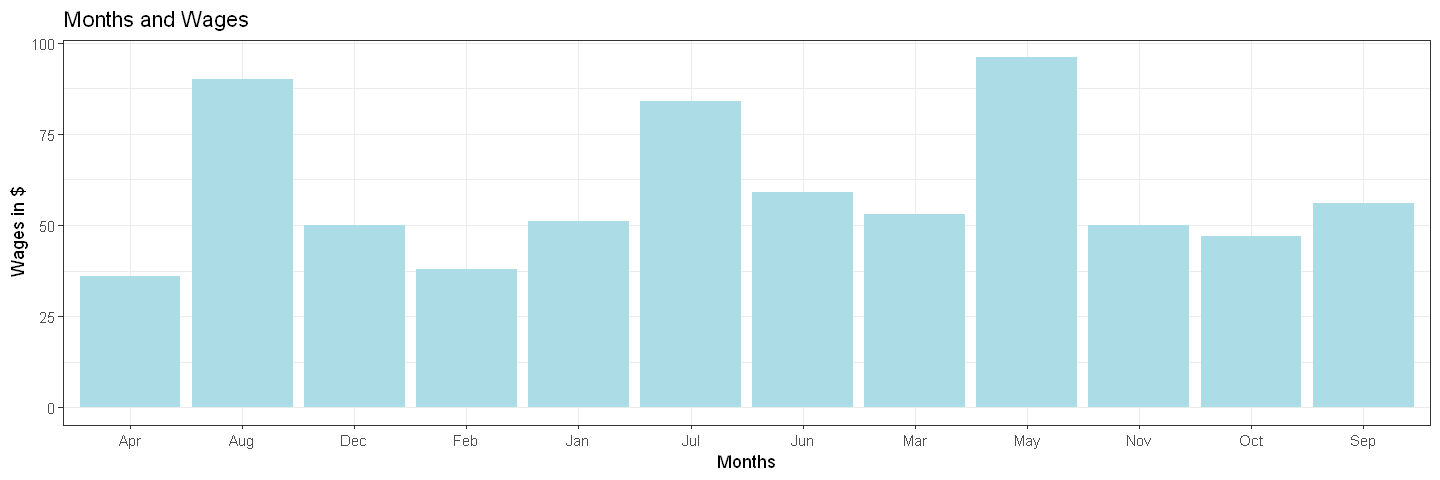

In [3]:
# Simple bar plot
month <- c(seq(1,12,1))
months <- month.abb[month]
wages<- floor(runif(12, min= 35, max=100))
df <- data.frame(months, wages)
plt <- ggplot(df, aes(x = months, y = wages)) + geom_bar( stat = 'identity', fill = "#acdce6")+ theme_bw()
plt <- plt + labs(title = "Months and Wages" ,x = "Months", y = "Wages in $")
print(plt)

#### Adding a theme to the plot 

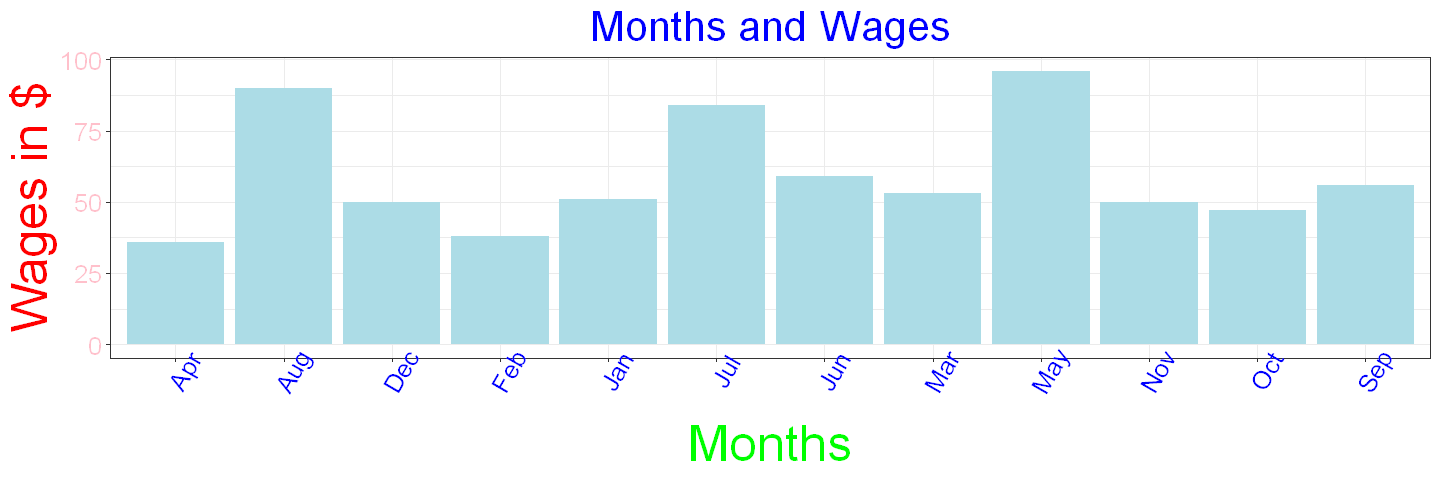

In [4]:
my_theme <- theme( 
                # Main title settings
                plot.title = element_text(size = 25, hjust = 0.5, colour = 'Blue'),
                # hjust = horizontal justification and 0.5 centres the title
                #Axis text is for the tickers
                axis.text.x = element_text(size = 15, colour = 'Blue', angle = 60),
                axis.text.y = element_text(size = 15, colour = 'pink'),
                # Axis title is the titles of axis
                axis.title.y = element_text(size = 30, color = 'red'),
                axis.title.x = element_text(size = 30, color = 'green'),
                )
plt <- plt + my_theme
print(plt)

<a id='the_destination'></a>

<a id='Scatter_plot'></a>

In [8]:
#Bar plots

options(repr.plot.width=12, repr.plot.height=4)
df <- iris %>% group_by(Species)%>%
summarise(SepalLen = mean(Sepal.Length), SepalWid = mean(Sepal.Width), PetalLen = mean(Petal.Length), PetalWid = mean(Petal.Width))
df

Species,SepalLen,SepalWid,PetalLen,PetalWid
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
#Gathering the df to long format
df <- gather(df, Parameter, value, SepalLen:PetalWid) 

#### Bar plot side by side -- Fill value is Prameter

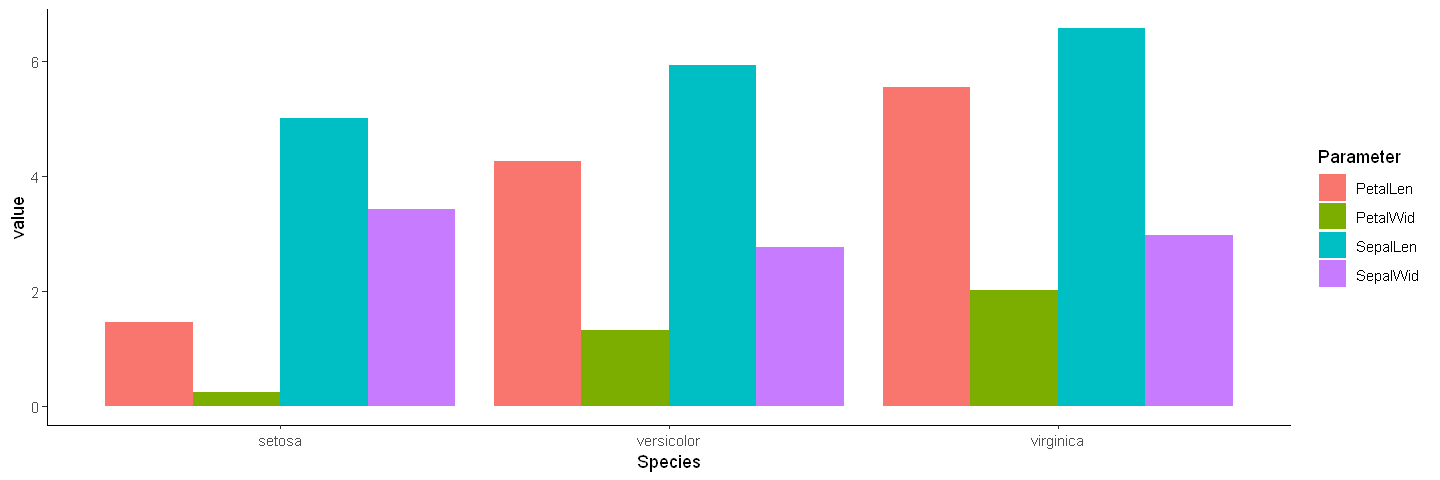

In [10]:
myplot <- ggplot(data = df, mapping = aes(x = Species, y = value, fill = Parameter))
myplot <- myplot+geom_bar(stat = "identity", position = 'dodge')+theme_classic()
myplot

#### Bar Plots side by side with fill value is Species

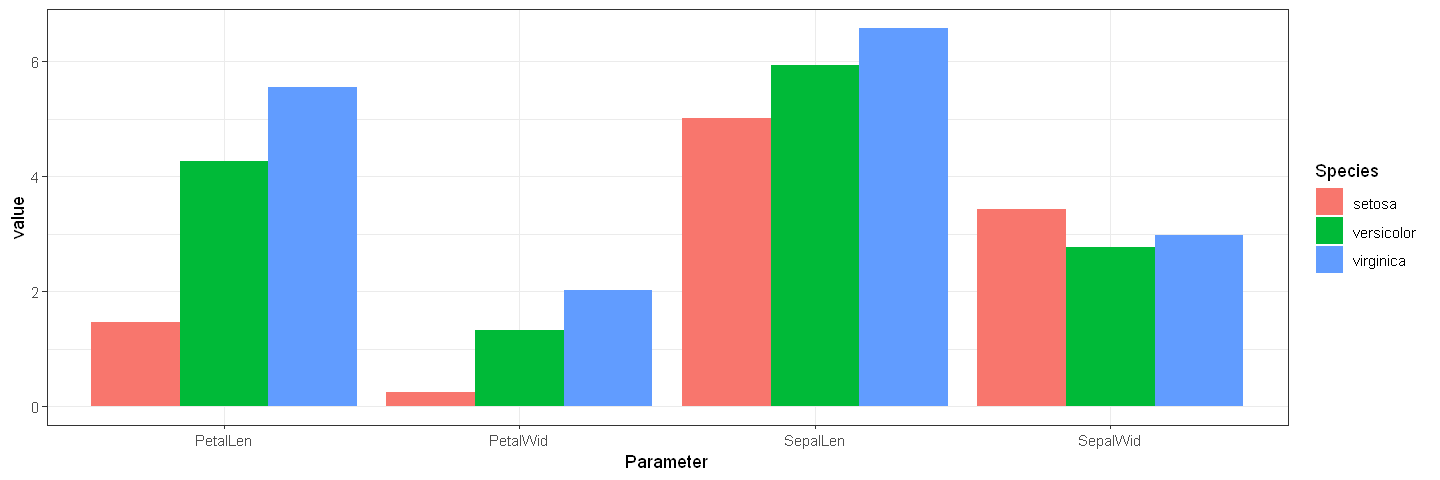

In [11]:
myplot1 <- ggplot(data = df, mapping = aes(x = Parameter, y = value, fill = Species))
myplot1 <- myplot1+geom_bar(stat = "identity", position = 'dodge')+ theme_bw()
myplot1

#### Bar plot with stacked bars : position = "dodge" is removed 

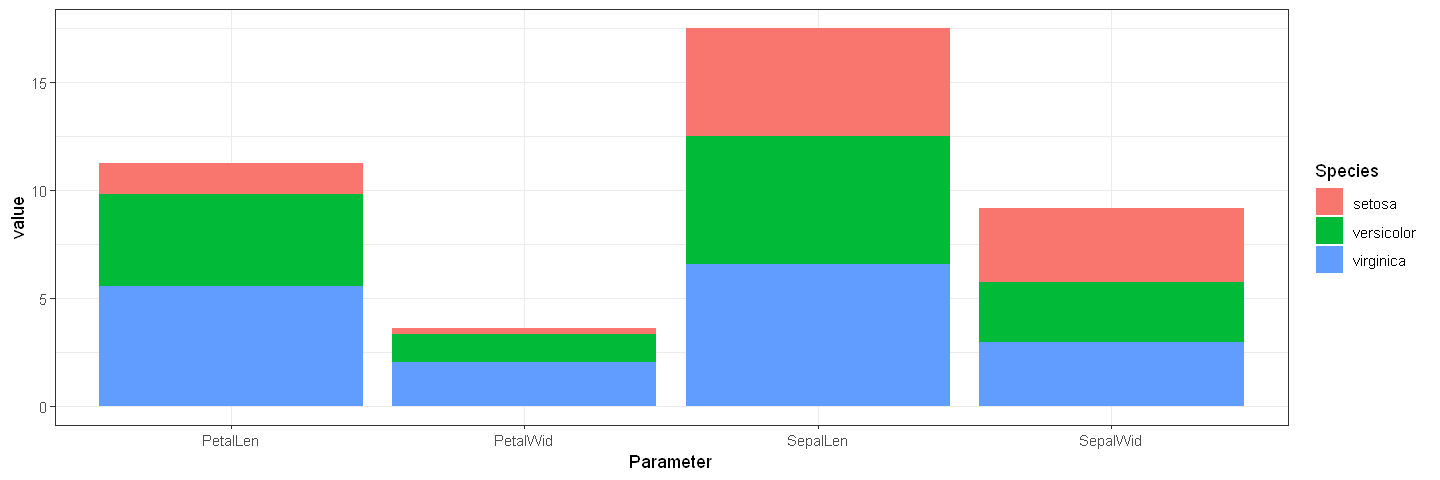

In [12]:
myplot1 <- ggplot(data = df, mapping = aes(x = Parameter, y = value, fill = Species))
myplot1 <- myplot1+geom_bar(stat = "identity")+ theme_bw()
myplot1

<a id = "Box_plot"></a>

### Box Plots() : For Box plots, x hast to be a categorical variable should not be a continious variable.

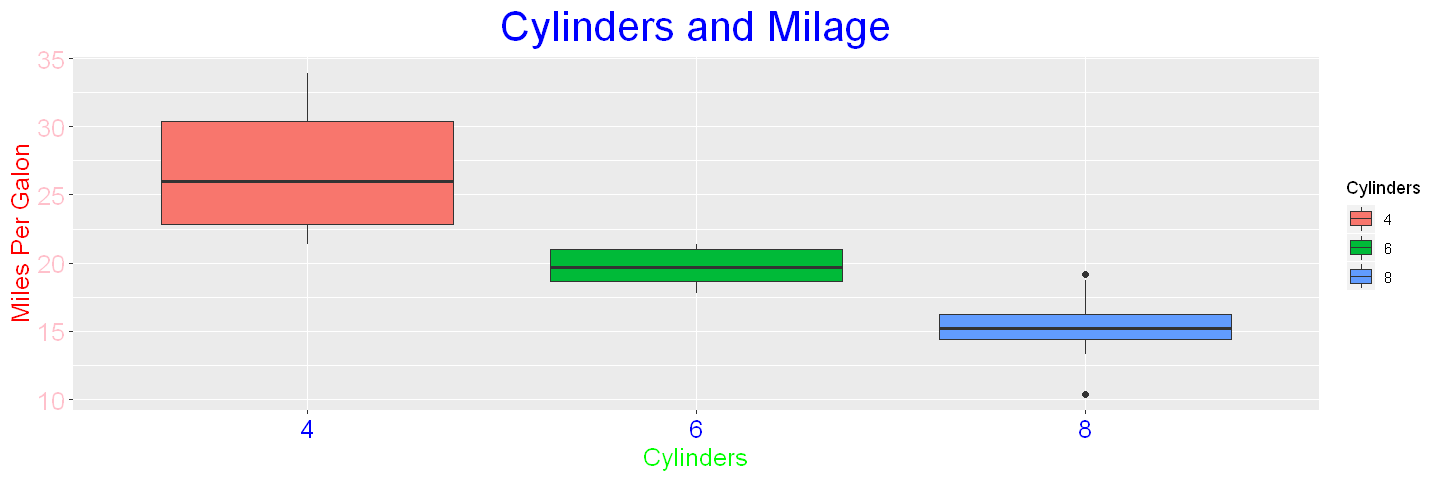

In [14]:
plt <- ggplot(mtcars, aes(x = factor(cyl) , y = mpg))
plt <- plt + geom_boxplot(aes (fill = factor(cyl)))
my_theme <- theme( 
                # Main title settings
                plot.title = element_text(size = 25, hjust = 0.5, colour = 'Blue'),
                # hjust = horizontal justification and 0.5 centres the title
                #Axis text is for the tickers
                axis.text.x = element_text(size = 15, colour = 'Blue'),
                axis.text.y = element_text(size = 15, colour = 'pink'),
                # Axis title is the titles of axis
                axis.title.y = element_text(size = 15, color = 'red'),
                axis.title.x = element_text(size = 15, color = 'green'),
                )
plt <- plt + ggtitle("Cylinders and Milage" ) + xlab("Cylinders") + ylab("Miles Per Galon")
plt <- plt + my_theme
plt <- plt + scale_fill_discrete(name = "Cylinders")
print(plt)